In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
list = train.select_dtypes(exclude=['float']).columns.tolist()
list.remove('PassengerId')
for i in list:
    train[i]=train[i].fillna('Missing')
    print(train[i].value_counts())

Earth      4602
Europa     2131
Mars       1759
Missing     201
Name: HomePlanet, dtype: int64
False      5439
True       3037
Missing     217
Name: CryoSleep, dtype: int64
Missing    199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Missing           182
Name: Destination, dtype: int64
False      8291
Missing     203
True        199
Name: VIP, dtype: int64
Missing               200
Sus Coolez              2
Elaney Webstephrey      2
Dia Cartez              2
Grake Porki             2
                     ... 
Jamela Griffy           1
Hardy Griffy            1
Salley Mckinn           1
Mall Frasp              1
Propsh Hontichre        1
Name: Name, Length: 8474, dtype: int64
True     4378
False    4315
Name: Transported, dtype: int64


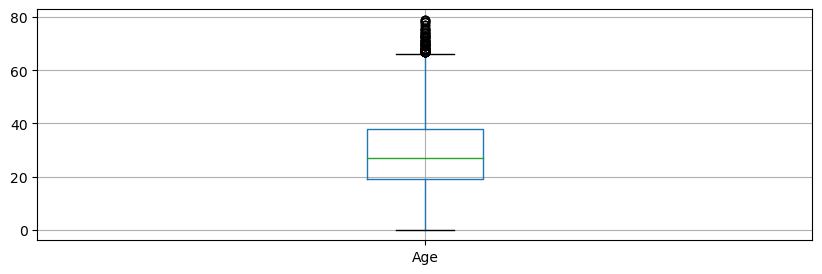

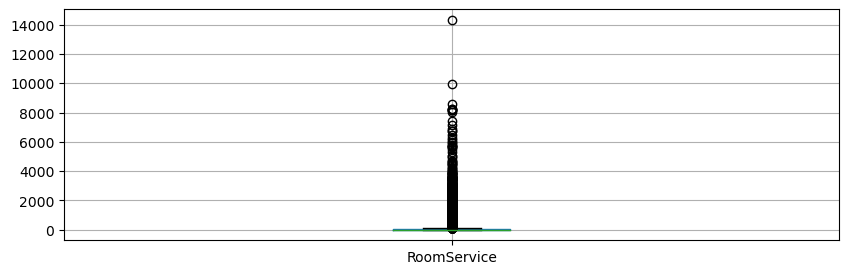

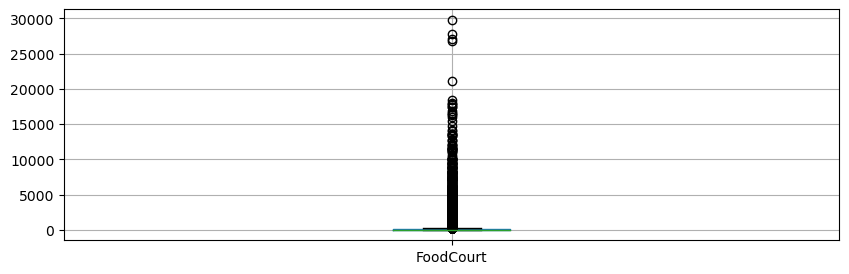

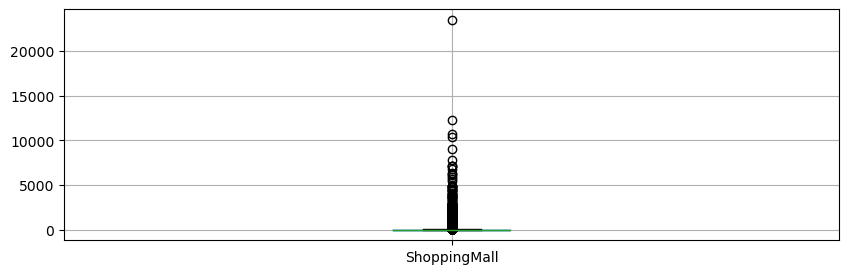

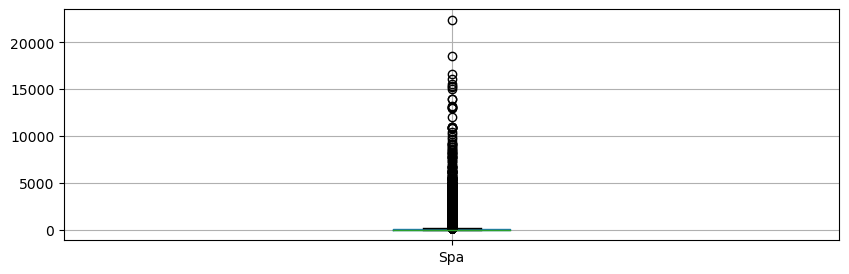

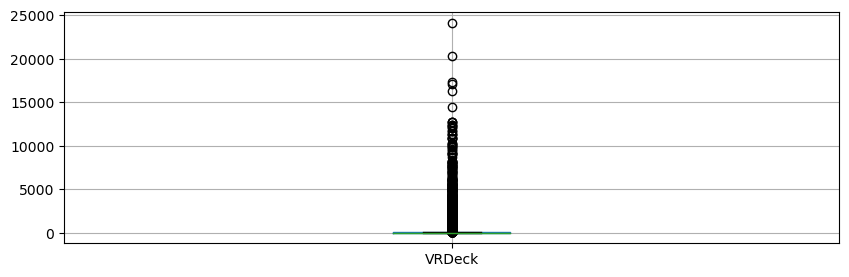

In [8]:
list = train.select_dtypes(include=['float']).columns.tolist()
for i in list:
    plt.figure(figsize=(10,3))
    train.boxplot(i)
    plt.show()
